**Library Import**

In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

**MNIST Dataset Loading**

In [15]:
# Load MNIST without normalization
raw_transform = transforms.ToTensor()  

train_dataset_raw = datasets.MNIST(root="./data", train=True, transform=raw_transform, download=True)
test_dataset_raw = datasets.MNIST(root="./data", train=False, transform=raw_transform, download=True)

# Calculation of mean and standard deviation for normalization purpose
X_train_raw = train_dataset_raw.data.numpy().astype('float32') / 255.0
y_train = train_dataset_raw.targets.numpy()
X_test_raw = test_dataset_raw.data.numpy().astype('float32') / 255.0
y_test = test_dataset_raw.targets.numpy()

X_train = X_train_raw.reshape(len(X_train_raw), -1)
X_test = X_test_raw.reshape(len(X_test_raw), -1)

mean = X_train.mean()
std = X_train.std()
print(f"Computed Mean: {mean:.4f}, Std: {std:.4f}")

# Normalized MNIST
normalized_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=normalized_transform, download=False)
test_dataset = datasets.MNIST(root="./data", train=False, transform=normalized_transform, download=False)

print("Training data shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Test data shape:", X_test.shape, "Labels shape:", y_test.shape)


Computed Mean: 0.1307, Std: 0.3081
Training data shape: (60000, 784) Labels shape: (60000,)
Test data shape: (10000, 784) Labels shape: (10000,)


**Function of Computation of PCA**

In [16]:
def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X_train), pca.transform(X_test)

**Training**

In [17]:
pca = PCA(n_components=31)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)

**Compute of Confusion Matrix and Performance matric**

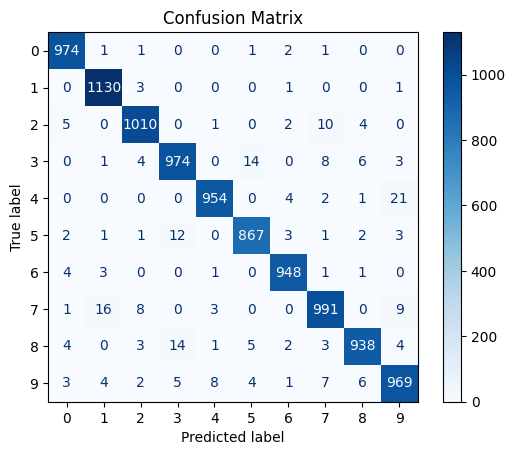

F1-score: 0.9755
Accuracy: 0.9755
Recall: 0.9755
Precision: 0.9755


In [18]:
# Predict using the trained classifier
y_pred = knn_clf.predict(X_test_pca)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("./Images/confusion_matrix.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

# Metrics Calculation
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Output the results
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


**Example of Final Result**

Correct Prediction Result

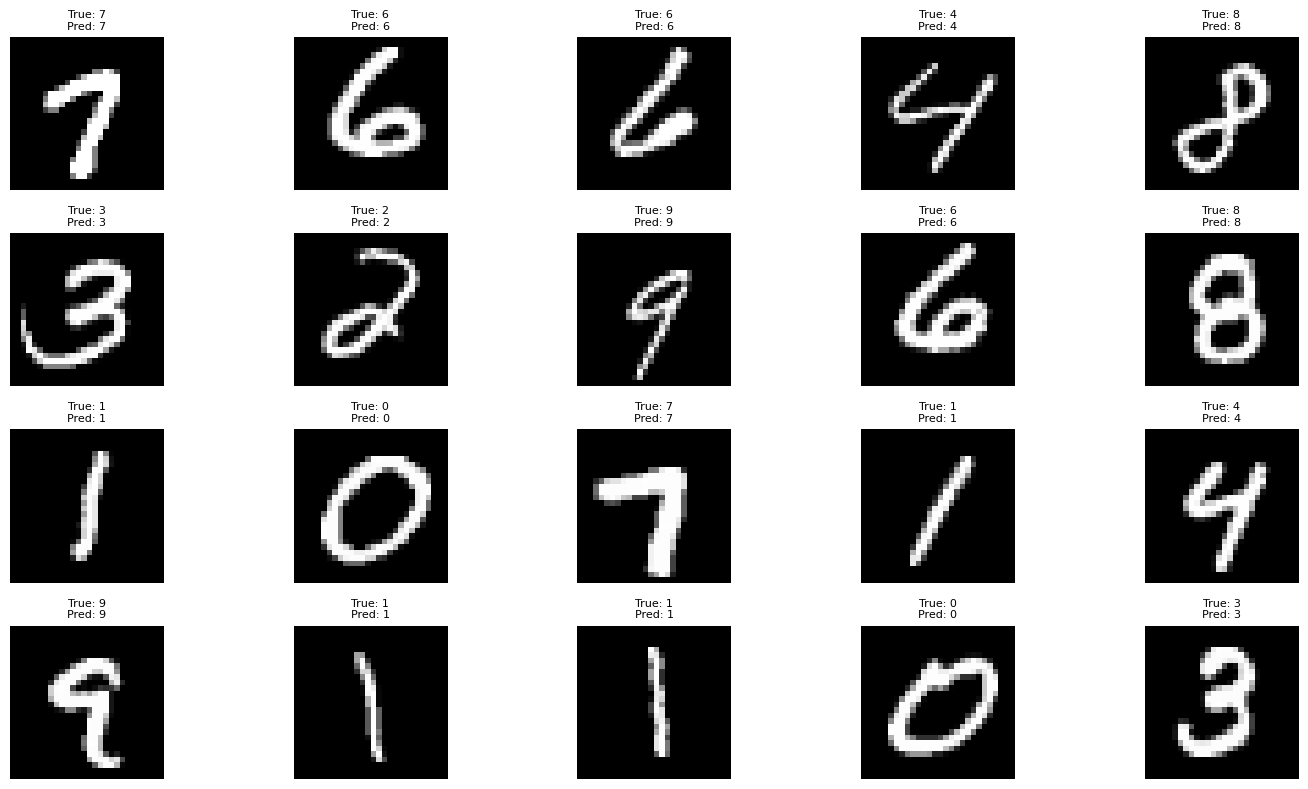

In [ ]:
correct_indices = np.where(y_pred == y_test)[0]

num_samples = min(20, len(correct_indices))
selected_indices = np.random.choice(correct_indices, num_samples, replace=False)

rows, cols = 4, 5
plt.figure(figsize=(15, 8))

for i, idx in enumerate(selected_indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray') 
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.savefig("./Images/sample_predictions_true.png", dpi=300, bbox_inches='tight')
plt.show()


Wrong Prediction Result

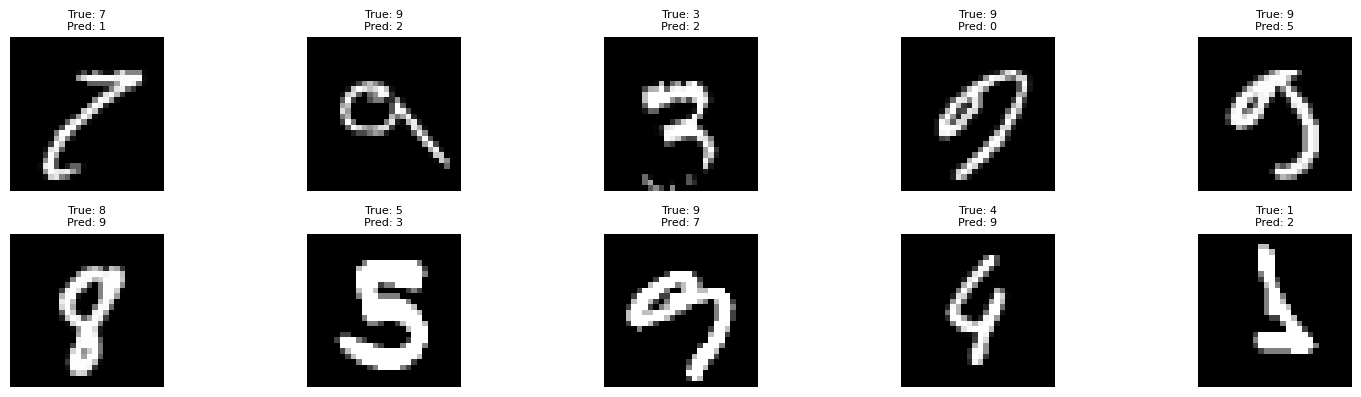

In [ ]:
wrong_indices = np.where(y_pred != y_test)[0]

num_samples = min(10, len(wrong_indices))
selected_indices = np.random.choice(wrong_indices, num_samples, replace=False)

rows, cols = 4, 5
plt.figure(figsize=(15, 8))

for i, idx in enumerate(selected_indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray') 
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.savefig("./Images/sample_predictions_false.png", dpi=300, bbox_inches='tight')
plt.show()
